In [1]:
# Import necessary libraries for data handling and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, confusion_matrix


In [2]:

# Load digits data
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensions for clustering (10D) and visualization (2D)
pca_10 = PCA(n_components=10)
X_pca_10 = pca_10.fit_transform(X_scaled)

pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

# Print shapes
print("Original shape:", X.shape)
print("Reduced for clustering:", X_pca_10.shape)
print("Reduced for visualization:", X_pca_2.shape)


Original shape: (1797, 64)
Reduced for clustering: (1797, 10)
Reduced for visualization: (1797, 2)


In [3]:

# DBSCAN parameters (tune as needed)
dbscan = DBSCAN(eps=2.0, min_samples=5)
labels = dbscan.fit_predict(X_pca_10)

# Count number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

#  Print clusters and noise
print(f"Estimated number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")


Estimated number of clusters: 17
Number of noise points: 555


In [4]:

# Silhouette Score (ignore -1/noise points)
mask = labels != -1
if np.sum(mask) > 1:
    silhouette = silhouette_score(X_pca_10[mask], labels[mask])
else:
    silhouette = -1

# Adjusted Rand Index
ari = adjusted_rand_score(y, labels)

# Print results
print(f"Silhouette Score (excluding noise): {silhouette:.4f}")
print(f"Adjusted Rand Index: {ari:.4f}")


Silhouette Score (excluding noise): 0.1374
Adjusted Rand Index: 0.2800


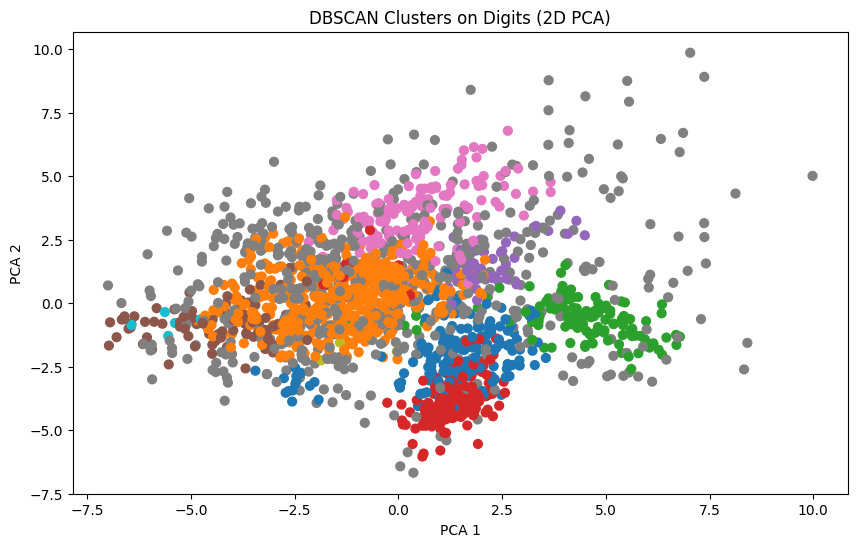

In [5]:

# Visualize clusters
plt.figure(figsize=(10, 6))
unique_labels = np.unique(labels)
palette = sns.color_palette("tab10", len(unique_labels))

# Assign gray color to noise
colors = [palette[label] if label != -1 else (0.5, 0.5, 0.5) for label in labels]

# Scatter plot
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=colors, s=40)
plt.title("DBSCAN Clusters on Digits (2D PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


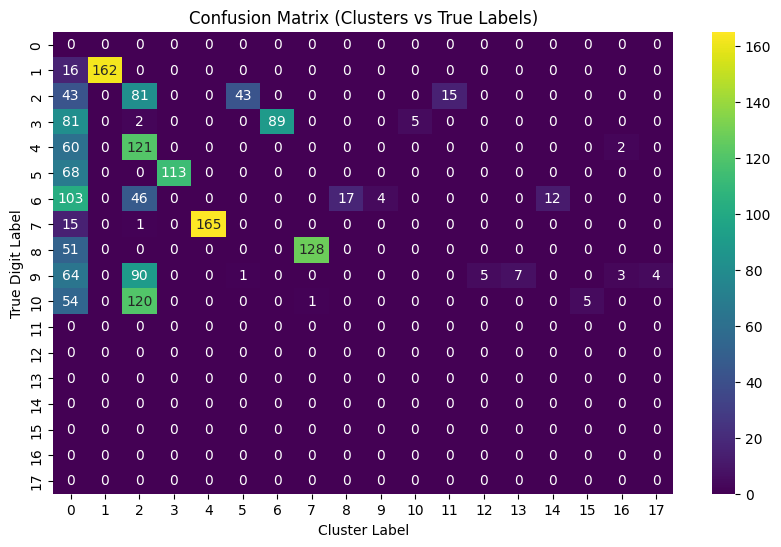

In [6]:

# Confusion matrix: only useful when many points aren't labeled as noise
if n_clusters > 0:
    conf_matrix = confusion_matrix(y, labels, labels=np.unique(labels))
    plt.figure(figsize=(10, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis")
    plt.title("Confusion Matrix (Clusters vs True Labels)")
    plt.xlabel("Cluster Label")
    plt.ylabel("True Digit Label")
    plt.show()


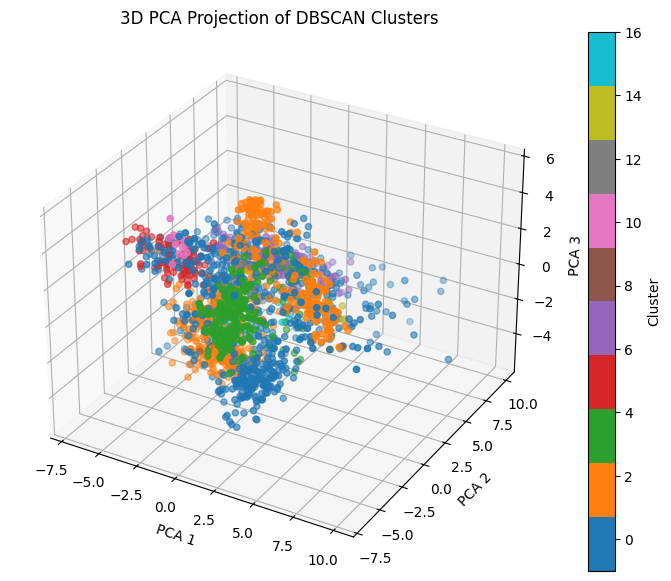

In [7]:

# 3D Visualization using PCA (3 components)
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Reduce to 3D for visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
colors = ['gray' if label == -1 else label for label in labels]
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=labels, cmap='tab10', s=20)
ax.set_title("3D PCA Projection of DBSCAN Clusters")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.colorbar(scatter, label='Cluster')
plt.show()
